# Text Analysis

In [1]:
import re
import pandas as pd
import numpy as np
from collections import Counter
from better_profanity import profanity
from tqdm.notebook import tqdm
_
# EDA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy import stats
import seaborn as sns
# Set style and plot size
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [15, 6]
_
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('processed_data/lyrics_processed.csv')
df_corpus = pd.read_csv('processed_data/artist_corupus.csv')
_
print(df.shape, '\n')
df.head()

(527, 17) 



,track_name,artist,raw_lyrics,artist_verses,verses_cleaned,verses_lemmatized,topic,pos_sentiment,neg_sentiment,word_count,words_per_min,bar_count,stop_word_count,is_featured,track_bpm,duration_min,is_explicit
0,You Broke My Heart,Drake,"Yeah Yeah Oh, baby, don't go Don't go Look Loo...","Yeah\nYeah\nOh, baby, don't go\nDon't go\nLook...",yeah yeah oh baby don't go don't go look look ...,yeah yeah oh baby go go look look note catch m...,Love,0.230,0.392,556,139.0,58,203.0,False,123.872,4.0,False
1,First Person Shooter (feat. J. Cole),Drake,"[Intro: J. Cole & Adonis] (Pew, pew-pew) Firs...",Big as the what? (Ah)\nBig as the what? (Mm)\n...,big as the what ah big as the what mm big as t...,big ah big mm big big super bowl difference tw...,Competitive,0.186,0.175,450,112.5,47,199.0,False,164.005,4.0,False
2,MELTDOWN (feat. Drake),Drake,[Intro: Drake] Yeah Tensions is definitely ri...,Yeah\nTensions is definitely rising\nT'd up ri...,yeah tensions is definitely rising t'd up righ...,yeah tension definitely rise right time time t...,Competitive,0.136,0.518,332,83.0,35,157.0,True,111.975,4.0,True
3,Slime You Out (feat. SZA),Drake,I don't know I don't know what's wrong with yo...,I don't know\nI don't know what's wrong with y...,i don't know i don't know what's wrong with yo...,know know wrong girls feel like need love need...,Competitive,0.206,0.144,553,110.6,51,235.0,False,88.880,5.0,True
4,On The Radar Freestyle,Drake,"Yeah On The Radar, 2023 6 G-O-D and my broski ...","Yeah\nOn The Radar, \n G-O-D and my broski \nC...",yeah on the radar g o d and my broski c you kn...,yeah rear g break c know madness badness combi...,Competitive,0.213,0.170,567,113.4,43,239.0,False,150.126,5.0,True


In [3]:
df.describe()

,pos_sentiment,neg_sentiment,word_count,words_per_min,bar_count,stop_word_count,track_bpm,duration_min
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,0.218949,0.186125,462.810247,121.611954,48.994307,194.510436,118.382613,3.903226
std,0.096090,0.094450,316.363580,84.955951,35.225266,113.956480,29.682570,1.037385
min,0.025000,0.000000,24.000000,8.000000,2.000000,8.000000,65.988000,1.000000
25%,0.156500,0.123500,268.500000,71.500000,28.500000,108.000000,92.021000,3.000000
50%,0.206000,0.174000,435.000000,115.000000,44.000000,181.000000,117.909000,4.000000
75%,0.264000,0.237000,586.500000,159.900000,63.500000,250.000000,140.017000,4.000000
max,0.798000,0.558000,3911.000000,1303.700000,459.000000,820.000000,196.505000,9.000000


Artist distribution:

In [4]:
df['artist'].value_counts()

artist
Drake             50
Nicki Minaj       50
Dave              50
Nas               49
Eminem            48
Kendrick Lamar    48
Rapsody           48
Skepta            48
Future            47
2Pac              47
J. Cole           42
Name: count, dtype: int64

### Vocabulary

Artist vocabulary size / unique words:

In [5]:
df_corpus['vocab_size'] = df_corpus['vocab'].apply(lambda x: len(x.split(' ')))
df_corpus['unique_words'] = df_corpus['vocab'].apply(lambda x: len(set(x.split(' '))))
_
df_corpus.sample(2)

,artist,vocab,vocab_size,unique_words,swear_word_count,clean_word_count,swear_word_perc,n_word_count,f_word_count
8,Rapsody,yeah reading sufi say time is money coining ru...,21006,5232,86.0,20920.0,0.411090,94.0,30.0
7,Kendrick Lamar,love let's talk about love is it anything and ...,20011,3195,347.0,19664.0,1.764646,81.0,142.0


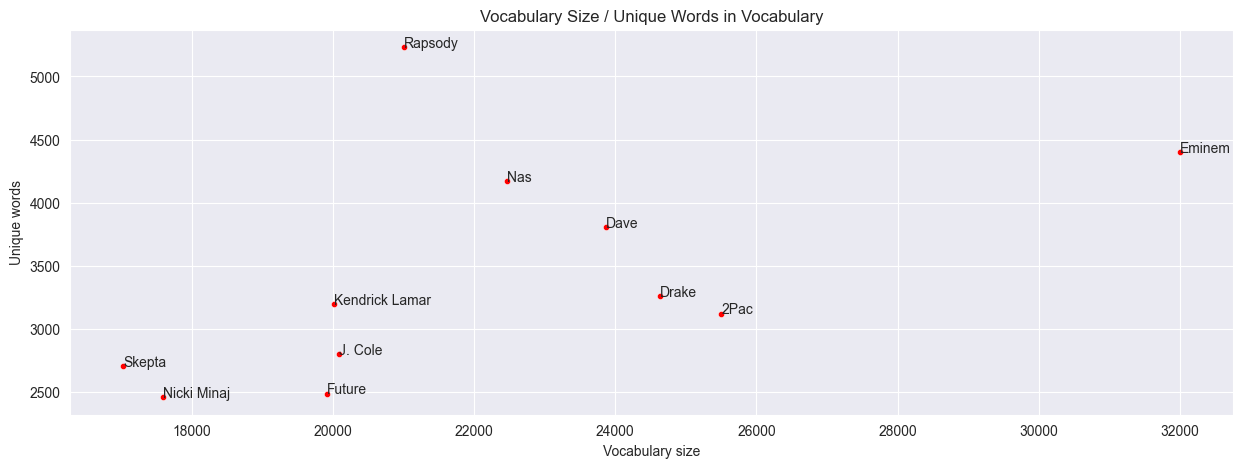

,artist,vocab_size,unique_words
8,Rapsody,21006,5232
1,Eminem,32003,4402
3,Nas,22466,4168
5,Dave,23870,3804
0,Drake,24636,3260
7,Kendrick Lamar,20011,3195
6,2Pac,25501,3118
10,J. Cole,20083,2797
9,Skepta,17023,2701
4,Future,19909,2486


In [6]:
plt.figure(figsize=(15, 5))
plt.title(f"Vocabulary Size / Unique Words in Vocabulary")
# Plot specs:

# Plot annotation text:
ax = sns.scatterplot(data=df_corpus, x='vocab_size', y='unique_words', color='red', s=20)
for i, text in enumerate(df_corpus['artist']):
    # Add text to plot:
    ax.text(df_corpus['vocab_size'][i], df_corpus['unique_words'][i], text, ha="left", va='baseline')

# Add proper labels:
plt.xlabel(f"Vocabulary size")
plt.ylabel(f"Unique words")
plt.show()
_
# Display dataset:
print()
df_corpus.sort_values(['unique_words'], ascending=False)[['artist', 'vocab_size', 'unique_words']]

- `Rapsody` has the most unique words with `5232`
- `Nicki Minaj` has the least unique words with `2457`
- `Eminem` has the largest vocabulary with `32003`
- `Skepta` has the smallest vocabulary with `17023`
- Meanwhile... `Drake` is in the middle with a vocabulary size of `24636` and a slightly lower unique word count of `3260`

### Word frequency

In [7]:
# Load in updated stop words list:
with open('../list_of_updated_stop_words.txt') as file:
    stop_words = file.read().split('\n')

Get top 10 most used words (exlcuding stop words) used by each artist:

In [8]:
for index, artist in enumerate(df_corpus['artist']):
    # Get the top 10 most common words for each artist:
    all_words = df_corpus['vocab'][index].split(' ')
    no_stop_words = [word for word in all_words if word not in stop_words]  # Remove stop words
    
    top_10 = Counter(no_stop_words).most_common(10)
    print(f"{artist}:", top_10)
    print()

Drake: [('yeah', 275), ('shit', 124), ('ayy', 114), ('niggas', 102), ('love', 98), ('woah', 83), ("'cause", 78), ('fuck', 74), ('baby', 71), ('time', 68)]

Eminem: [('yeah', 170), ("'cause", 152), ('shit', 115), ("'em", 105), ('eminem', 97), ('fuck', 92), ('shady', 81), ('love', 74), ('time', 72), ("fuckin'", 72)]

Nicki Minaj: [('yeah', 129), ('boom', 109), ('bitches', 78), ('uh', 76), ('love', 76), ('fuck', 67), ('oo', 64), ('bitch', 60), ('baby', 56), ('nicki', 54)]

Nas: [('yeah', 120), ('nas', 103), ('niggas', 94), ('uh', 70), ('yo', 65), ('time', 55), ('shit', 55), ("'cause", 53), ('life', 53), ("y'all", 49)]

Future: [('yeah', 292), ('bitch', 145), ('shit', 122), ('love', 99), ('nigga', 87), ('woah', 85), ('fuck', 75), ('niggas', 70), ('bitches', 60), ('wanna', 57)]

Dave: [('wanna', 122), ('girl', 98), ("'cause", 54), ('love', 47), ('gonna', 42), ('gotta', 41), ('time', 39), ('talk', 38), ('life', 37), ('fuck', 36)]

2Pac: [('niggas', 152), ('nigga', 150), ('die', 116), ('life'

- Rappers like to cuss
- And `Drake` is no different

Most common words in dataset (excluding stop words):

In [9]:
all_words = [word for word in " ".join(df_corpus['vocab']).split(' ') if word not in stop_words]
all_word_counts = Counter(all_words).most_common(10) 
_
all_word_counts

[('yeah', 1465),
 ('love', 825),
 ('shit', 688),
 ('niggas', 659),
 ('wanna', 655),
 ('fuck', 639),
 ("'cause", 634),
 ('nigga', 607),
 ('time', 540),
 ('bitch', 518)]

Average word count / words per minute:

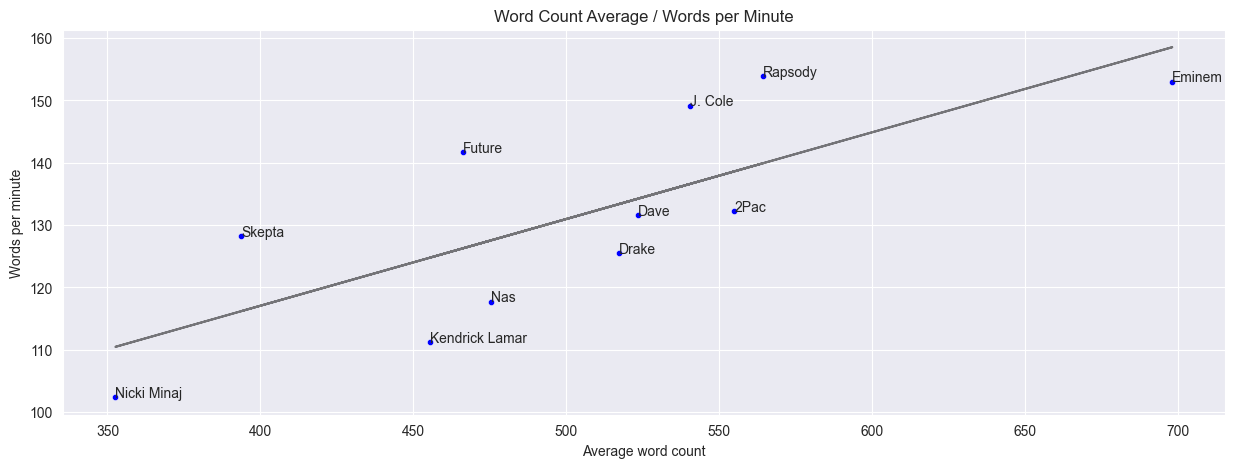

In [10]:
# Filter out features
no_feat = df[df['is_featured'] == False]
# Aggregate averages:
no_feat_avgs = (no_feat
 .groupby(['artist'])
 .agg(avg_word_count=('word_count', 'mean'), avg_words_min=('words_per_min', 'mean'))
 .reset_index()
)
_
# Plot specs:
plt.figure(figsize=(15, 5))
plt.title(f"Word Count Average / Words per Minute")

# Plot linear regression line:
slope, intercept, r_value, p_value, std_err = stats.linregress(no_feat_avgs['avg_word_count'], no_feat_avgs['avg_words_min'])
line = slope * no_feat_avgs['avg_word_count'] + intercept
plt.plot(no_feat_avgs['avg_word_count'], line, color='k', alpha=0.5)

# Plot annotation text:
ax = sns.scatterplot(data=no_feat_avgs, x='avg_word_count', y='avg_words_min', color='blue', s=20)
for i, text in enumerate(no_feat_avgs['artist']):
    # Add text to plot:
    ax.text(no_feat_avgs['avg_word_count'][i], no_feat_avgs['avg_words_min'][i], text, ha="left", va='baseline')

# Add proper labels:
plt.xlabel(f"Average word count")
plt.ylabel(f"Words per minute")
plt.show()

- Once again `Rapsody` and `Eminem` have the highest word count / words per min average
- `Nicki Minaj`has the lowest word count average and words per min average
- And once again `Drake` is in the middle...

WordCloud:

In [11]:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white")

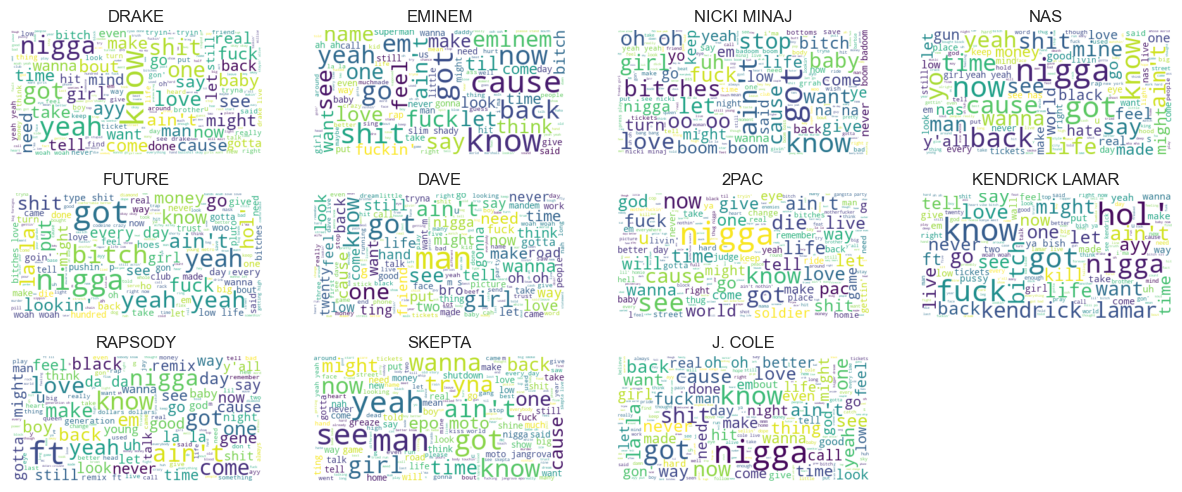

In [12]:
# Plot specs:
for i, artist in enumerate(df_corpus['artist']):
    wordcloud.generate(df_corpus['vocab'][i])
    plt.subplot(3, 4, i+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"{artist.upper()}")
    plt.axis("off")


plt.show()

### Profanity

Swear word frequency for each artist:<br>
**NOTE:** I don't consider "nigga" a swear word and it's rarely used with a negative connotation in rap.

Find all permutations of profanity words:

In [13]:
def is_swear_word(word: str) -> str:
    """
    Identify if word is a swear word.
    """
    swear_words = [
        'ass', 'dickhead', 'bitch', 'bitches', 'fuck', 'fuckers', 'motherfuckers',
        'shit', 'dyke', 'cunt', 'asshole', 'arsehole', 'arse', 'faggot', 'hoes',
        'whore', 'motherfuckin', 'motherfuck', 'shits', 'fucked', 'fucker', 'hoe',
        'whores', 'pussy', 'pussies', 'clit', 'dicks', 'dick'
    ]

    for swear_word in swear_words:
        if swear_word == word:
            return swear_word

    return -1
    
_
for index, row in df_corpus.iterrows():
    # Get unique words in artist's vocab:
    all_words = row['vocab'].split(' ')
    # Identify swear words:
    swear_words = [word for word in all_words if type(is_swear_word(word)) != int]
    # Identify clean words:
    clean_words = [word for word in all_words if type(is_swear_word(word)) == int]

    # Store values in dataframe
    df_corpus.loc[index, 'swear_word_count'] = len(swear_words)
    df_corpus.loc[index, 'clean_word_count'] = len(clean_words)
    
    swear_word_counts = Counter(swear_words).most_common(10)
    print(f"{row['artist']}:", swear_word_counts)
    print()

Drake: [('shit', 124), ('fuck', 74), ('bitch', 39), ('bitches', 23), ('ass', 18), ('pussy', 17), ('hoes', 13), ('dick', 8), ('fucked', 7), ('shits', 2)]

Eminem: [('shit', 115), ('fuck', 92), ('bitch', 69), ('ass', 36), ('fucked', 18), ('bitches', 15), ('dick', 13), ('motherfuckers', 11), ('hoes', 9), ('faggot', 3)]

Nicki Minaj: [('bitches', 78), ('fuck', 67), ('bitch', 60), ('ass', 26), ('dick', 13), ('shit', 13), ('pussy', 11), ('hoes', 9), ('fucked', 3), ('shits', 1)]

Nas: [('shit', 55), ('fuck', 22), ('ass', 17), ('bitch', 14), ('bitches', 9), ('hoes', 7), ('dick', 7), ('motherfuckers', 6), ('pussy', 4), ('faggot', 2)]

Future: [('bitch', 145), ('shit', 122), ('fuck', 75), ('bitches', 60), ('hoes', 45), ('fucked', 9), ('ass', 9), ('pussy', 8), ('dick', 8)]

Dave: [('fuck', 36), ('shit', 19), ('hoes', 10), ('fucked', 8), ('bitch', 8), ('pussy', 3), ('dick', 3), ('bitches', 2), ('clit', 2), ('fucker', 1)]

2Pac: [('fuck', 74), ('shit', 58), ('motherfuckers', 37), ('bitches', 29), (

Nigga to fuck ratio:

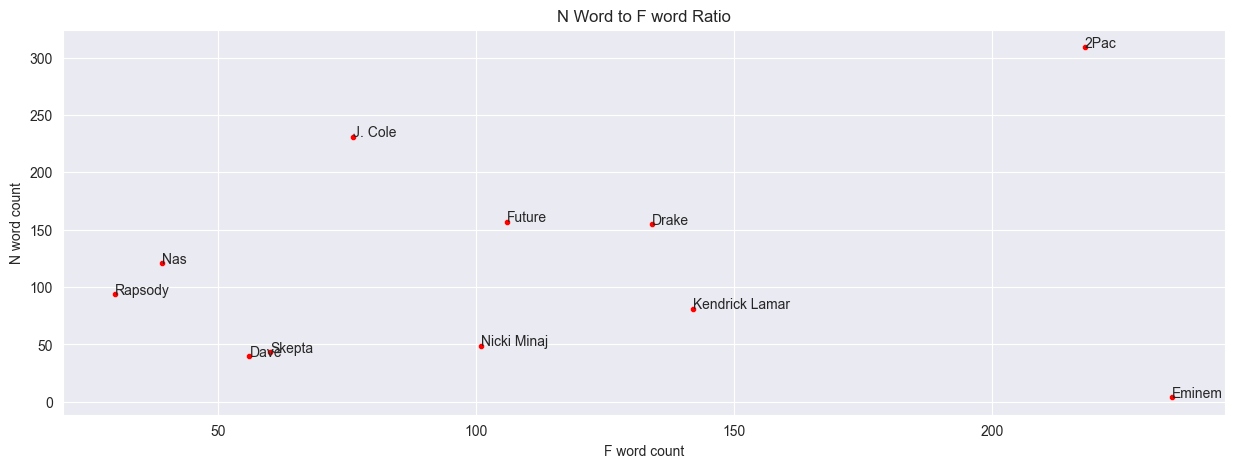

In [14]:
# Match prefixes:
for prefix in ['nigga', 'fuck']:
    for index, row in df_corpus.iterrows():
        word_counts = Counter(row['vocab'].split(' '))

        # Tally word counts that match each prefix:
        total = 0
        for word, count in word_counts.items():
            if prefix in word:
                total += count

        df_corpus.loc[index, f"{prefix[0]}_word_count"] = total

_
# Plot specs:
plt.figure(figsize=(15, 5))
plt.title(f"N Word to F word Ratio")

# Plot annotation text:
ax = sns.scatterplot(data=df_corpus, x='f_word_count', y='n_word_count', color='red', s=20)
for i, text in enumerate(df_corpus['artist']):
    # Add text to plot:
    ax.text(df_corpus['f_word_count'][i], df_corpus['n_word_count'][i], text, ha="left", va='baseline')

plt.xlabel(f"F word count")
plt.ylabel(f"N word count")
plt.show()

- `2Pac` says the n-word and f-word the most
- `Eminem` says the n-word the least but the f-word the most
- `Rapsody` says boths words the least
-  And once again `Drake` is in the middle

Percentage of swear words in each verse:

In [15]:
# divide the part (the smaller value) by the whole (the larger value), and then multiply the result by 100.
df_corpus['swear_word_perc'] = (df_corpus['swear_word_count'] / df_corpus['clean_word_count']) * 100
_
print("Swear Word Percentage in Vocabulary:")
print("------------------------------------")
for index, row in df_corpus.sort_values(['swear_word_perc'], ascending=False)[['artist', 'swear_word_perc']].iterrows():
    print(f"{row['artist']}: {row['swear_word_perc']:0.2}%")

Swear Word Percentage in Vocabulary:
------------------------------------
Future: 2.5%
Kendrick Lamar: 1.8%
Nicki Minaj: 1.6%
Drake: 1.3%
Eminem: 1.2%
2Pac: 1.1%
J. Cole: 1.1%
Nas: 0.65%
Skepta: 0.54%
Rapsody: 0.41%
Dave: 0.39%


In [16]:
# Save dataframe
df_corpus.to_csv("processed_data/artist_corupus.csv", index=False)

### Lyric themes

In [17]:
# Reformat topic values:
for key_topic in ['Competitive', 'Love', 'Violence', 'Drugs', 'Sex', 'Hopeful']:
    for index, row in df.iterrows():
        if key_topic in re.sub("[^\w ]+", '', row['topic']):
            df.loc[index, 'topic'] = key_topic

# Remove any remaining invalid entries:
df = df[~df['topic'].apply(lambda x: len(x) > 12)]

In [18]:
# Calculate percetnages of each topic:
topic_counts = df['topic'].value_counts().to_dict()

print("TOPIC PERCENTAGE:")
print("-----------------")
for topic, count in topic_counts.items():
    perc = (count / len(df)) * 100
    print(f"{topic}: {perc:0.3}%")

TOPIC PERCENTAGE:
-----------------
Competitive: 30.7%
Violence: 22.3%
Love: 19.1%
Sex: 13.0%
Drugs: 8.02%
Hopeful: 6.87%


Theme distribution:

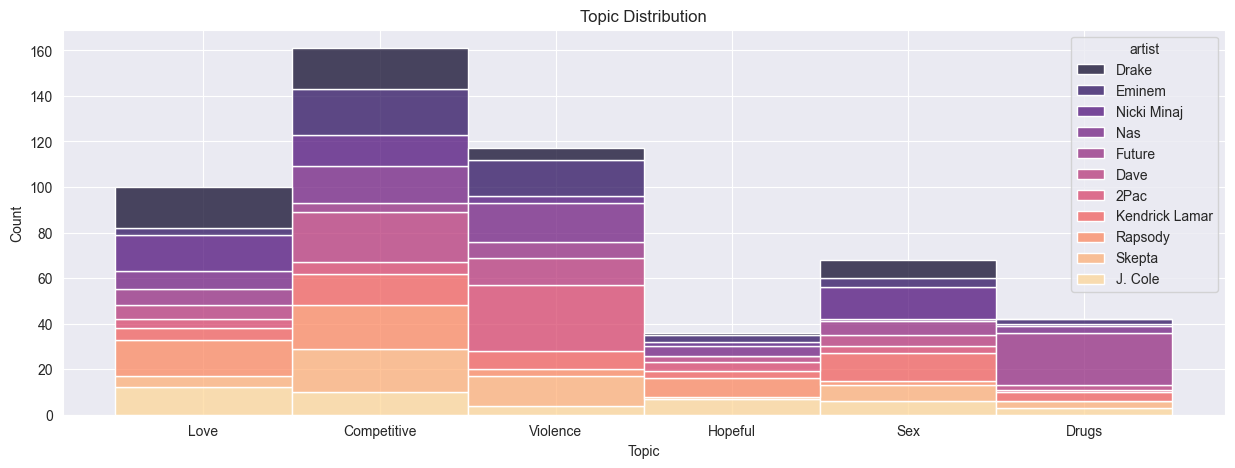

In [19]:
plt.figure(figsize=(15, 5))
plt.title(f"Topic Distribution")
sns.histplot(data=df, x='topic', multiple='stack', hue='artist', palette='magma')
plt.xlabel(f"Topic")
plt.show()

- 30.7% of lyrics are about being competitive
- `2Pac` raps the most about violence
- `Future` raps the most about drugs
- `Kendrick Lamar` and `Nicki Minaj` rap the most about sex
-  While `Eminem` raps the least about love 
- `Dave` and `Eminem` rap the most about being competitive
-  And `Drake` raps the most about being competitive and love and the least about drugs and being hopeful lol
-  `Drake` is the only male rapper that raps more about love than both female rappers `Nicki Minaj` and `Rapsody`

Sentiment analysis vs theme:

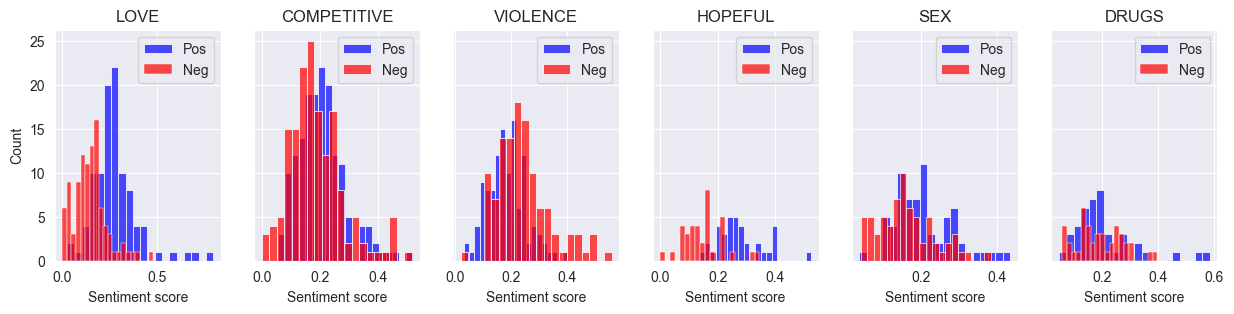

In [20]:
f, axs = plt.subplots(1, len(df['topic'].unique()), figsize=(15, 3), sharey=True)
for index, topic in enumerate(df['topic'].unique()):
    sns.histplot(data=df[df['topic'] == topic], bins=20, x='pos_sentiment', color='blue', alpha=0.7, label='Pos', ax=axs[index])
    sns.histplot(data=df[df['topic'] == topic], bins=20, x='neg_sentiment', color='red', alpha=0.7, label='Neg', ax=axs[index])
    axs[index].set_title(f"{topic.upper()}")
    axs[index].set_xlabel(f"Sentiment score")
    axs[index].legend()

plt.show()

- `Drugs` kinda positive??
- `Violence` is mostly negative
- `Competitive` is mixed

Each artist's sentiment:

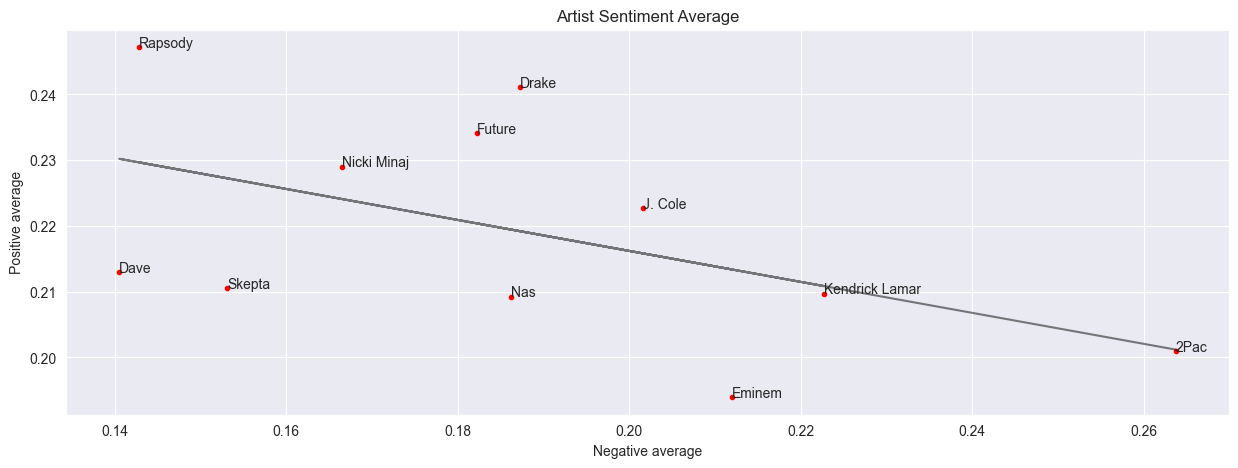

In [21]:
# Get positive / negative sentiment average for each artist:
avg_sent = (df
 .groupby(['artist'])
 .agg(avg_pos=('pos_sentiment', 'mean'), avg_neg=('neg_sentiment', 'mean'))
 .reset_index()
)
_
# Plot specs:
plt.figure(figsize=(15, 5))
plt.title(f"Artist Sentiment Average")
ax = sns.scatterplot(data=avg_sent, x='avg_neg', y='avg_pos', color='red', s=20)

# Plot linear regression line:
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_sent['avg_neg'], avg_sent['avg_pos'])
line = slope * avg_sent['avg_neg'] + intercept
plt.plot(avg_sent['avg_neg'], line, color='k', alpha=0.5)

# Plot annotation text:
for i, text in enumerate(avg_sent['artist']):
    # Add text to plot:
    ax.text(avg_sent['avg_neg'][i], avg_sent['avg_pos'][i], text, ha="left", va='baseline')

# Add proper labels:
plt.xlabel(f"Negative average")
plt.ylabel(f"Positive average")
plt.show()

- `Rapsody` has the highest positive average
- `2Pac` has the highest negative average
- `Kendrick Lamar` has the second highest negative average
- `Eminem` has the lowest positive average
- `Dave` has the lowest negative average
-  And `Drake` has the second highest positive average

### Misc

All entries here are featured on each artist's Spotify top 50 chart — the most popular songs for each artist. Let's see how many entries are features on other songs or actual songs by the artist.

In [22]:
# Filter dataframes for further use:
feat_df = df[df['track_name'].str.contains('feat', case=False)]
solo_df = df[~df['track_name'].str.contains('feat', case=False)]

Feature / solo percentage:

In [23]:
# Number of entries for each artist in enitre dataframe:
artist_entries = df['artist'].value_counts().to_dict()
feat_entires = feat_df['artist'].value_counts().to_dict()
solo_entries = solo_df['artist'].value_counts().to_dict()

# Iterate through solo / feature entries and calculate percentage:
data_dict = {'artist': [], 'solo': [], 'feat': []}

for artist, total in artist_entries.items():
    feat_count = feat_entires[artist]
    solo_count = solo_entries[artist]

    feat_percentage = (feat_count / total) * 100
    solo_percentage = (solo_count / total) * 100

    data_dict['artist'].append(artist)
    data_dict['solo'].append(solo_percentage)
    data_dict['feat'].append(feat_percentage)

    print(f"{artist.upper()} — SOLO: {solo_percentage:0.3}%, FEATURED: {feat_percentage:0.3}%")

DRAKE — SOLO: 62.0%, FEATURED: 38.0%
NICKI MINAJ — SOLO: 62.0%, FEATURED: 38.0%
DAVE — SOLO: 68.0%, FEATURED: 32.0%
NAS — SOLO: 65.3%, FEATURED: 34.7%
EMINEM — SOLO: 85.4%, FEATURED: 14.6%
RAPSODY — SOLO: 66.7%, FEATURED: 33.3%
SKEPTA — SOLO: 75.0%, FEATURED: 25.0%
FUTURE — SOLO: 68.1%, FEATURED: 31.9%
2PAC — SOLO: 95.7%, FEATURED: 4.35%
KENDRICK LAMAR — SOLO: 73.9%, FEATURED: 26.1%
J. COLE — SOLO: 73.8%, FEATURED: 26.2%


- `2Pac` has the most solo tracks, with `Eminem` in second
- While `Drake` and `Nicki Minaj` have the most featured tracks

Explicit track count:

In [46]:
print("EXPLICIT TRACKS PER ARTIST:")
print("---------------------------")
for artist in df['artist'].unique():
    explicit_counts = df[df['artist'] == artist]['is_explicit'].value_counts().to_dict()
    if len(explicit_counts) == 1:  # Only explicit tracks exists
        print(f"{artist} — explicit: {explicit_counts[True]}, clean: 0")
    else:
        print(f"{artist} — explicit: {explicit_counts[True]}, clean: {explicit_counts[False]}")

EXPLICIT TRACKS PER ARTIST:
---------------------------
Drake — explicit: 39, clean: 11
Eminem — explicit: 48, clean: 0
Nicki Minaj — explicit: 44, clean: 6
Nas — explicit: 41, clean: 8
Future — explicit: 43, clean: 4
Dave — explicit: 43, clean: 7
2Pac — explicit: 45, clean: 1
Kendrick Lamar — explicit: 43, clean: 3
Rapsody — explicit: 36, clean: 12
Skepta — explicit: 35, clean: 13
J. Cole — explicit: 39, clean: 3


Average bar count:

In [51]:
(solo_df
 .groupby(['artist'])
 .agg(avg_bar_count=('bar_count', 'mean'))
 .reset_index()
 .sort_values(['avg_bar_count'], ascending=False)
)

,artist,avg_bar_count
3,Eminem,68.829268
9,Rapsody,61.062500
0,2Pac,59.136364
1,Dave,57.588235
5,J. Cole,53.258065
7,Nas,52.718750
2,Drake,51.516129
6,Kendrick Lamar,48.911765
4,Future,46.250000
10,Skepta,43.972222


- `Eminem` has the highest bar count average with 68.8
- `Nicki Minaj` has the lowest bar count average with 37.9
- `Drake` is in the lower half with a bar count average of 51.5